Importing Libraries for data and visulaization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_column', None)   # reading all columns
pd.set_option('display.max_colwidth', None) # reading all values in the column
pd.set_option('display.max_row', None)      # reading all rows

###  **1. This Data is Created by our team for hand letters detection, 32 classes (letters)**
---

### **2. Libraries used for this (opencv-python, mediapipe, pandas)**
- ``opencv-python`` library: for using the camera and taking the photos frame by frame for every letter
- ``mediapip``: Takes the frame created by `opencv-python` and puts 21 landmark for every hand and ubstract the landmark's coordinates (x, y, and z)
- ``pandas``: Takes the output (coordinates) from `mediapipe`, add it in a data frame with the target column (every letter in arabic), and create a .csv file from it

---
### **3.(Challenges And Insights With Data Collecting)**

- The whole landmarks(i) indecies (xi, yi, and zi) is substracted from the landmark(0) indecies (x0, y0, and z0), ***This to have one*** **Refrence Point** becuase the place of the hand is changing in every frame
- Drop the landmark(0) and it's coordinates from the data
- There is no **NULL** vlues cause we droped the samples that ``mediapipe`` library failed to upstract (no hands on the photo, or some photos with bad lighting or fiailed to detect a hand), and photos with 2 or more hands was processed
- Using encoding with ``opencv-python`` to write the target with Arabic, cause it's based on cpp
- every feature represent the distance between the landmark(i) coordinated and the landmark(0) coordinate



In [3]:
df = pd.read_csv(r"dataset/Sign_Language_dataset.csv")
df.head()

x1        y1        z1        x2        y2        z2        x3  \
0  0.032826 -0.015055 -0.021736  0.041789 -0.059959 -0.031918  0.007329   
1  0.040537 -0.039528 -0.021757  0.054753 -0.108066 -0.030255  0.041918   
2  0.067210 -0.014531 -0.040671  0.122653 -0.069908 -0.058440  0.169168   
3  0.016175 -0.092077 -0.000989  0.009117 -0.177429 -0.009526  0.010705   
4  0.017322 -0.037600 -0.024133  0.008862 -0.084932 -0.031630 -0.019657   

         y3        z3        x4        y4        z4        x5        y5  \
0 -0.078674 -0.041910 -0.028562 -0.084673 -0.048362  0.023319 -0.156151   
1 -0.169373 -0.039339  0.014095 -0.209146 -0.047448  0.046087 -0.186020   
2 -0.117906 -0.076623  0.213341 -0.146885 -0.092406  0.079635 -0.172694   
3 -0.244263 -0.024084  0.021904 -0.304652 -0.037155 -0.087585 -0.165876   
4 -0.113789 -0.037148 -0.048028 -0.120767 -0.042255 -0.021326 -0.132500   

         z5        x6        y6        z6        x7        y7        z7  \
0 -0.010482  0.024775 -0.217413 -0.036180  0.016779 -0.238967 -0.048474   
1 -0.016344  0.056435 -0.275379 -0.034757  0.059832 -0.329766 -0.046923   
2 -0.034940  0.095390 -0.265628 -0.065607  0.101852 -0.323344 -0.072086   
3  0.012520 -0.123503 -0.226312 -0.007922 -0.128299 -0.276455 -0.022051   
4 -0.011071 -0.041586 -0.187344 -0.022361 -0.058233 -0.221270 -0.031107   

         x8        y8        z8        x9        y9        z9       x10  \
0  0.009990 -0.220873 -0.050376 -0.012763 -0.147991 -0.011442 -0.051755   
1  0.060601 -0.376745 -0.054660  0.015876 -0.188343 -0.019408  0.013318   
2  0.101834 -0.369500 -0.085866  0.037735 -0.168806 -0.028310  0.043914   
3 -0.131495 -0.314625 -0.031079 -0.103806 -0.146659 -0.001564 -0.083033   
4 -0.070803 -0.249363 -0.037599 -0.043416 -0.115359 -0.006222 -0.072487   

        y10       z10       x11       y11       z11       x12       y12  \
0 -0.207394 -0.036865 -0.052823 -0.220514 -0.046482 -0.045852 -0.207476   
1 -0.285796 -0.040845  0.012249 -0.350555 -0.056366  0.009247 -0.402298   
2 -0.218824 -0.074181  0.046512 -0.143014 -0.079789  0.045281 -0.115035   
3 -0.233138 -0.033112 -0.035727 -0.202875 -0.041798 -0.023829 -0.169347   
4 -0.152181 -0.026548 -0.068643 -0.124712 -0.036335 -0.054706 -0.103005   

        z12       x13       y13       z13       x14       y14       z14  \
0 -0.044894 -0.037788 -0.121070 -0.017096 -0.043627 -0.121507 -0.045262   
1 -0.065215 -0.012372 -0.169455 -0.025021 -0.014373 -0.231082 -0.055195   
2 -0.065783 -0.005959 -0.154028 -0.028786  0.000503 -0.183369 -0.079629   
3 -0.038886 -0.110739 -0.126586 -0.018572 -0.071899 -0.199465 -0.052875   
4 -0.036812 -0.058978 -0.092206 -0.003775 -0.085018 -0.119945 -0.022875   

        x15       y15       z15       x16       y16       z16       x17  \
0 -0.025899 -0.098684 -0.048515 -0.016015 -0.084649 -0.040443 -0.052767   
1  0.003587 -0.202287 -0.063599  0.015082 -0.168796 -0.060910 -0.038306   
2  0.006288 -0.122508 -0.061504  0.010912 -0.097096 -0.037420 -0.045220   
3 -0.032877 -0.152300 -0.046306 -0.036504 -0.114758 -0.031249 -0.111235   
4 -0.079906 -0.099334 -0.026010 -0.065683 -0.080558 -0.021698 -0.068196   

        y17       z17       x18       y18       z18       x19       y19  \
0 -0.084996 -0.024567 -0.042016 -0.076577 -0.043913 -0.026456 -0.056228   
1 -0.137983 -0.032167 -0.033740 -0.181357 -0.055560 -0.016968 -0.171889   
2 -0.139646 -0.032819 -0.037543 -0.167120 -0.064652 -0.030043 -0.119178   
3 -0.105025 -0.035758 -0.073055 -0.166569 -0.056264 -0.043867 -0.136537   
4 -0.064472 -0.003373 -0.092326 -0.085456 -0.017470 -0.089321 -0.079095   

        z19       x20       y20       z20 label  
0 -0.043989 -0.019893 -0.048838 -0.036658     ة  
1 -0.059071 -0.005680 -0.153300 -0.056405     ت  
2 -0.053598 -0.025049 -0.101552 -0.031218     ل  
3 -0.046806 -0.051386 -0.100928 -0.033660     ن  
4 -0.018513 -0.076024 -0.067381 -0.014640     ب

In [4]:
df.shape

(7218, 61)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7218 entries, 0 to 7217
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7218 non-null   float64
 1   y1      7218 non-null   float64
 2   z1      7218 non-null   float64
 3   x2      7218 non-null   float64
 4   y2      7218 non-null   float64
 5   z2      7218 non-null   float64
 6   x3      7218 non-null   float64
 7   y3      7218 non-null   float64
 8   z3      7218 non-null   float64
 9   x4      7218 non-null   float64
 10  y4      7218 non-null   float64
 11  z4      7218 non-null   float64
 12  x5      7218 non-null   float64
 13  y5      7218 non-null   float64
 14  z5      7218 non-null   float64
 15  x6      7218 non-null   float64
 16  y6      7218 non-null   float64
 17  z6      7218 non-null   float64
 18  x7      7218 non-null   float64
 19  y7      7218 non-null   float64
 20  z7      7218 non-null   float64
 21  x8      7218 non-null   float64
 22  

- The data has 61 column (60 column for the data), and 1 for the label
- The has no catigorical columns all the data is numerical except the targe column (NO need for encoding)
- The data has no NULL values


In [6]:
df.isnull().sum()

x1       0
y1       0
z1       0
x2       0
y2       0
z2       0
x3       0
y3       0
z3       0
x4       0
y4       0
z4       0
x5       0
y5       0
z5       0
x6       0
y6       0
z6       0
x7       0
y7       0
z7       0
x8       0
y8       0
z8       0
x9       0
y9       0
z9       0
x10      0
y10      0
z10      0
x11      0
y11      0
z11      0
x12      0
y12      0
z12      0
x13      0
y13      0
z13      0
x14      0
y14      0
z14      0
x15      0
y15      0
z15      0
x16      0
y16      0
z16      0
x17      0
y17      0
z17      0
x18      0
y18      0
z18      0
x19      0
y19      0
z19      0
x20      0
y20      0
z20      0
label    0
dtype: int64

In [7]:
df.describe()

x1           y1           z1           x2           y2  \
count  7218.000000  7218.000000  7218.000000  7218.000000  7218.000000   
mean      0.050152    -0.051472    -0.018616     0.083357    -0.133690   
std       0.038199     0.034520     0.025112     0.061682     0.061845   
min      -0.176321    -0.212550    -0.158034    -0.260494    -0.444805   
25%       0.036409    -0.070495    -0.033589     0.058489    -0.169337   
50%       0.052434    -0.045142    -0.019650     0.086746    -0.127567   
75%       0.073569    -0.027397    -0.001329     0.121847    -0.091213   
max       0.166877     0.035897     0.092646     0.255599     0.076833   

                z2           x3           y3           z3           x4  \
count  7218.000000  7218.000000  7218.000000  7218.000000  7218.000000   
mean     -0.031292     0.097080    -0.198557    -0.045658     0.099271   
std       0.032551     0.082781     0.085169     0.037982     0.108438   
min      -0.338566    -0.317574    -0.609522    -0.496134    -0.398272   
25%      -0.048397     0.057804    -0.248574    -0.064315     0.034465   
50%      -0.029267     0.102599    -0.193673    -0.041786     0.103884   
75%      -0.013562     0.150354    -0.137744    -0.025276     0.171373   
max       0.125348     0.360454     0.111377     0.191047     0.459575   

                y4           z4           x5           y5           z5  \
count  7218.000000  7218.000000  7218.000000  7218.000000  7218.000000   
mean     -0.243544    -0.057654     0.044787    -0.228529    -0.016766   
std       0.106525     0.044827     0.060602     0.070397     0.031524   
min      -0.764729    -0.658037    -0.197095    -0.465036    -0.478352   
25%      -0.306928    -0.081031     0.016063    -0.279250    -0.030162   
50%      -0.237662    -0.052878     0.053013    -0.226448    -0.013996   
75%      -0.168919    -0.032357     0.084905    -0.174994    -0.000951   
max       0.138551     0.266676     0.293196     0.067742     0.147177   

                x6           y6           z6           x7           y7  \
count  7218.000000  7218.000000  7218.000000  7218.000000  7218.000000   
mean      0.072257    -0.298389    -0.045159     0.089291    -0.316210   
std       0.088338     0.099197     0.042957     0.103721     0.126237   
min      -0.310339    -0.638097    -0.693663    -0.414709    -0.774758   
25%       0.035422    -0.368555    -0.064699     0.045045    -0.401515   
50%       0.073865    -0.296046    -0.041320     0.087242    -0.304646   
75%       0.120303    -0.220778    -0.022574     0.143220    -0.225593   
max       0.372755     0.106601     0.235175     0.476791     0.133736   

                z7           x8           y8           z8           x9  \
count  7218.000000  7218.000000  7218.000000  7218.000000  7218.000000   
mean     -0.062544     0.100269    -0.327227    -0.072050     0.016848   
std       0.049580     0.118015     0.156088     0.053912     0.058586   
min      -0.820304    -0.504137    -0.894399    -0.894775    -0.243951   
25%      -0.085889     0.045693    -0.436390    -0.097178    -0.011769   
50%      -0.058074     0.094637    -0.305481    -0.066534     0.019429   
75%      -0.035443     0.162286    -0.212338    -0.041898     0.049259   
max       0.276614     0.600035     0.154153     0.298317     0.249991   

                y9           z9          x10          y10          z10  \
count  7218.000000  7218.000000  7218.000000  7218.000000  7218.000000   
mean     -0.221255    -0.025110     0.053461    -0.285404    -0.057989   
std       0.070781     0.031191     0.095961     0.104503     0.045813   
min      -0.456710    -0.482637    -0.403840    -0.657470    -0.760171   
25%      -0.270705    -0.037417     0.002226    -0.357780    -0.081251   
50%      -0.219687    -0.019511     0.043407    -0.280238    -0.052849   
75%      -0.170750    -0.007562     0.102489    -0.211443    -0.032630   
max       0.067986     0.171963     0.421376     0.107189     0.272080   

              

- The scale of the data is from 1 to -1 so no need for scalling

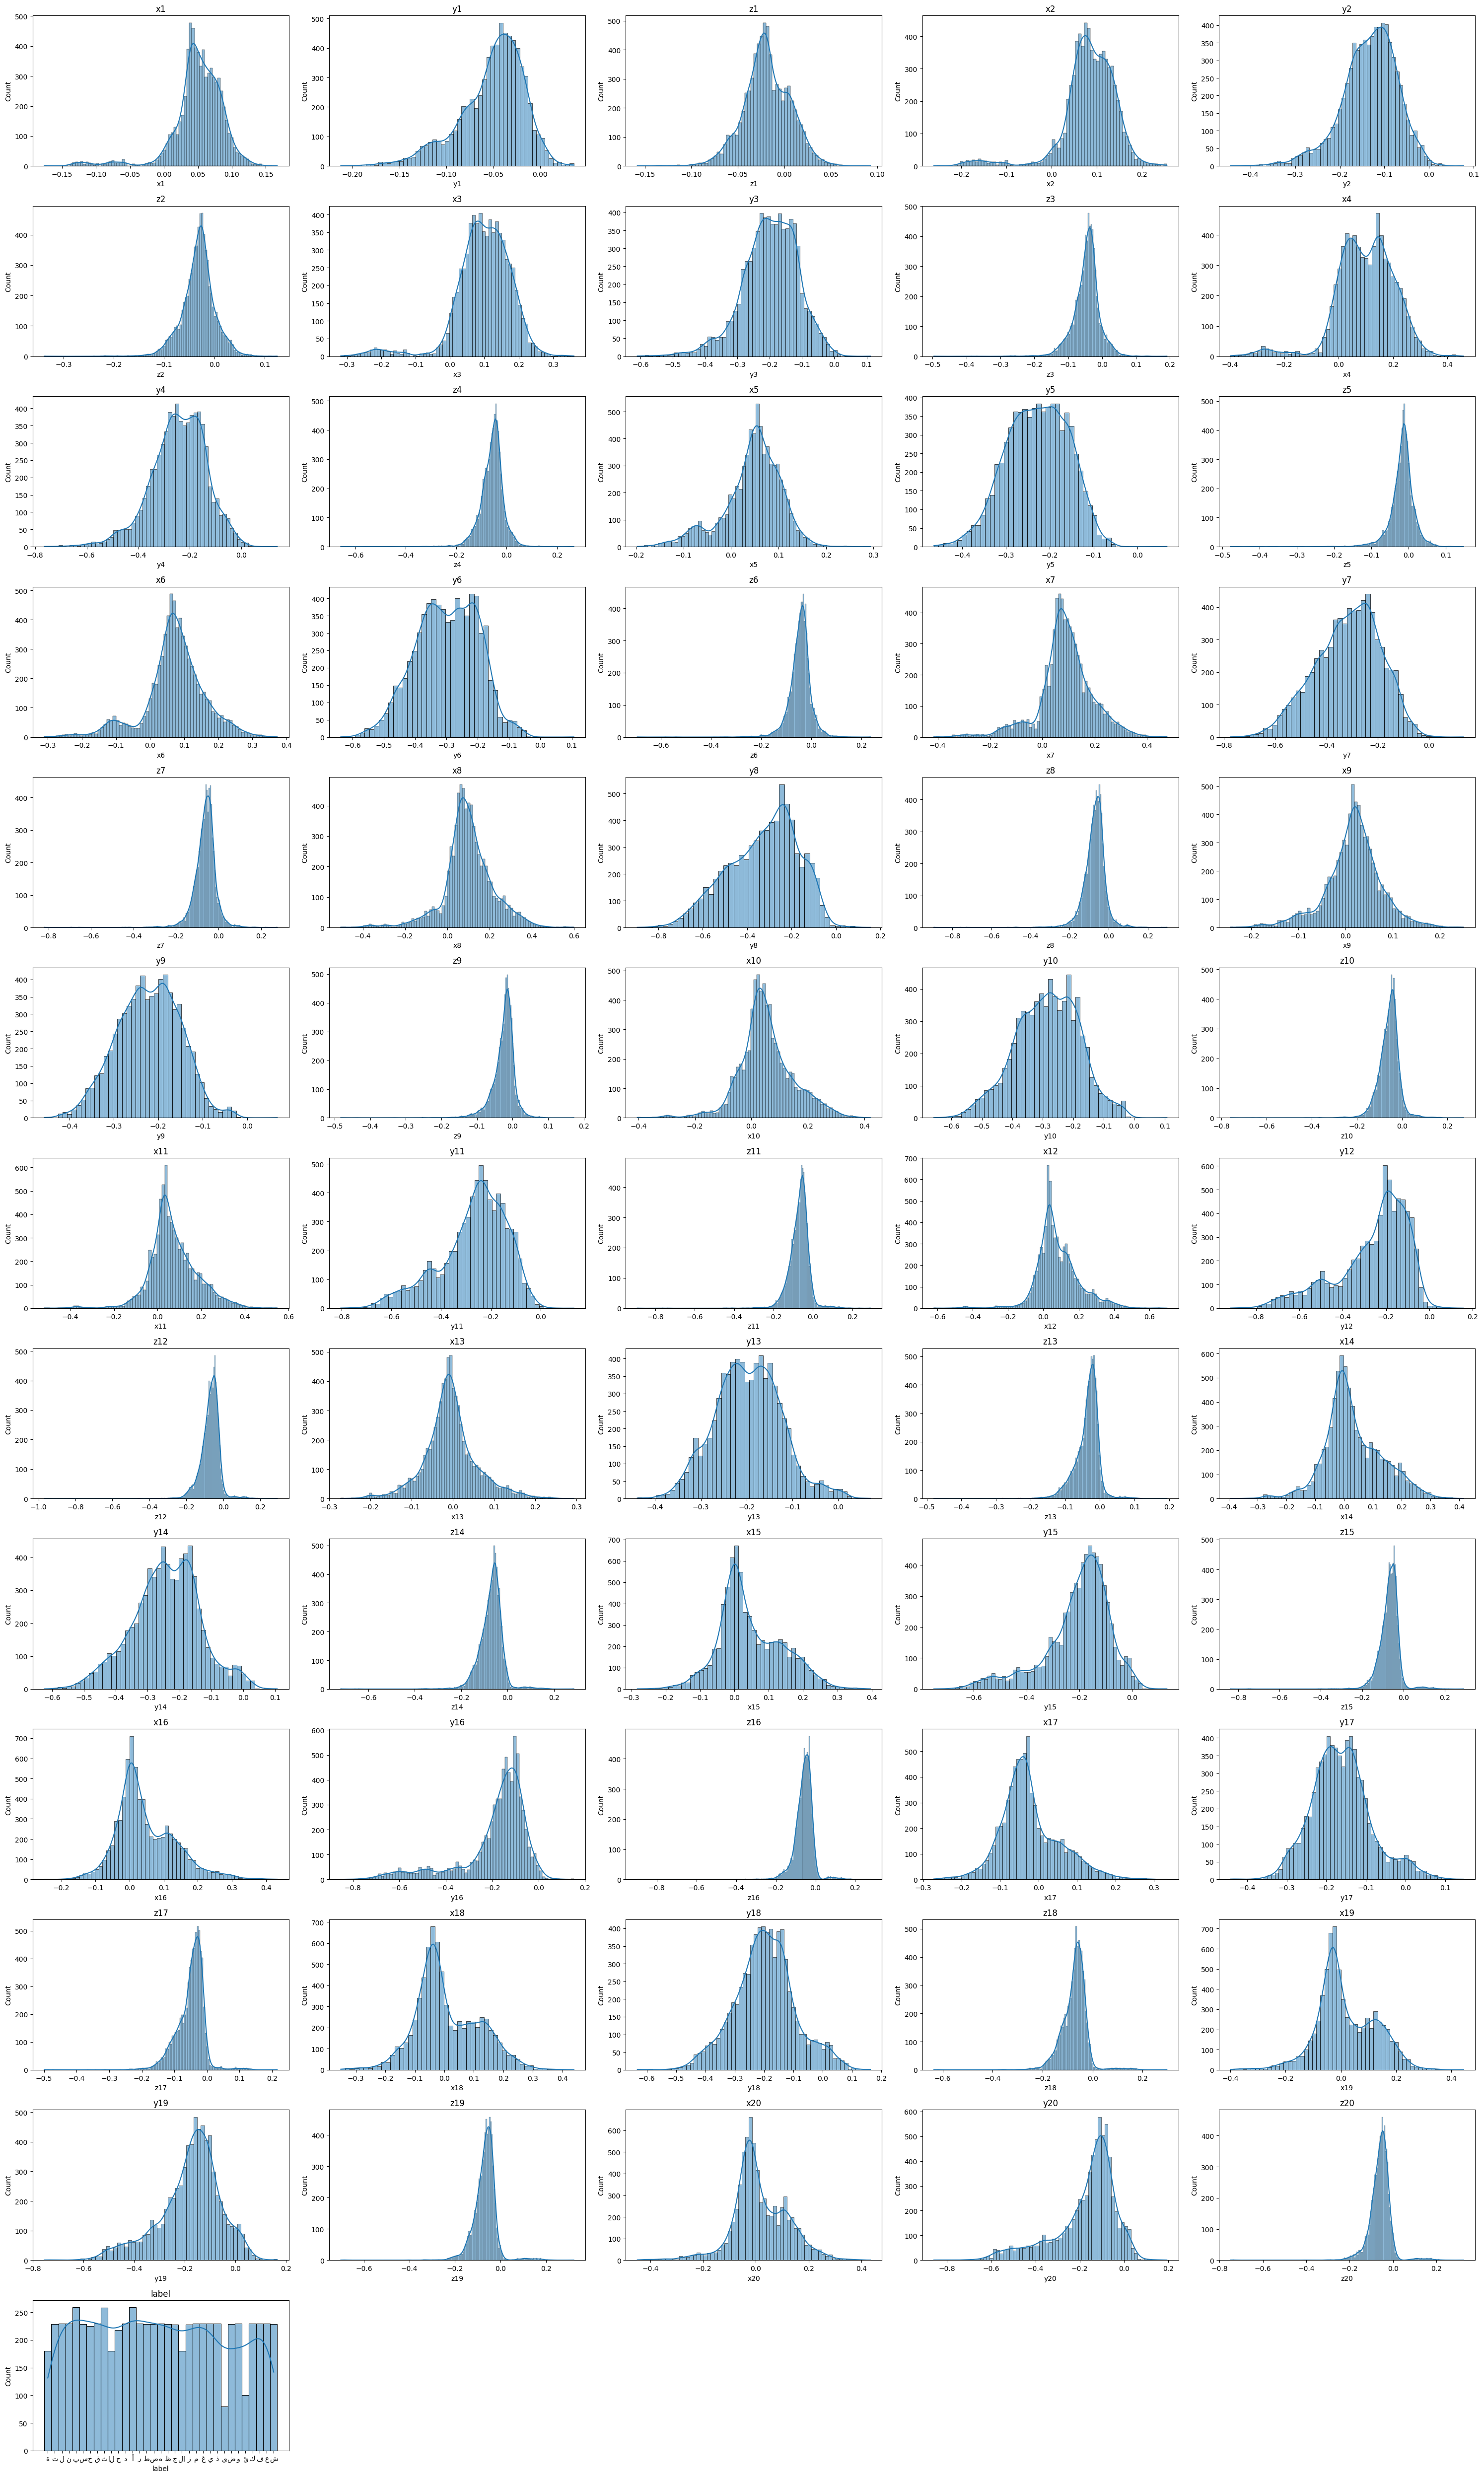

In [8]:
plt.figure(figsize= (30, 50))

for index, col in enumerate(df.columns, 1):
    plt.subplot(13, 5, index)
    sns.histplot(df[col], kde= True)
    plt.title(col)

plt.tight_layout()
plt.show()


- Some columns a littel bit skewed but not extreme
- The targe column has some classes have little examplese from another calsses (non-balanced data), So may need to use weights of the classes

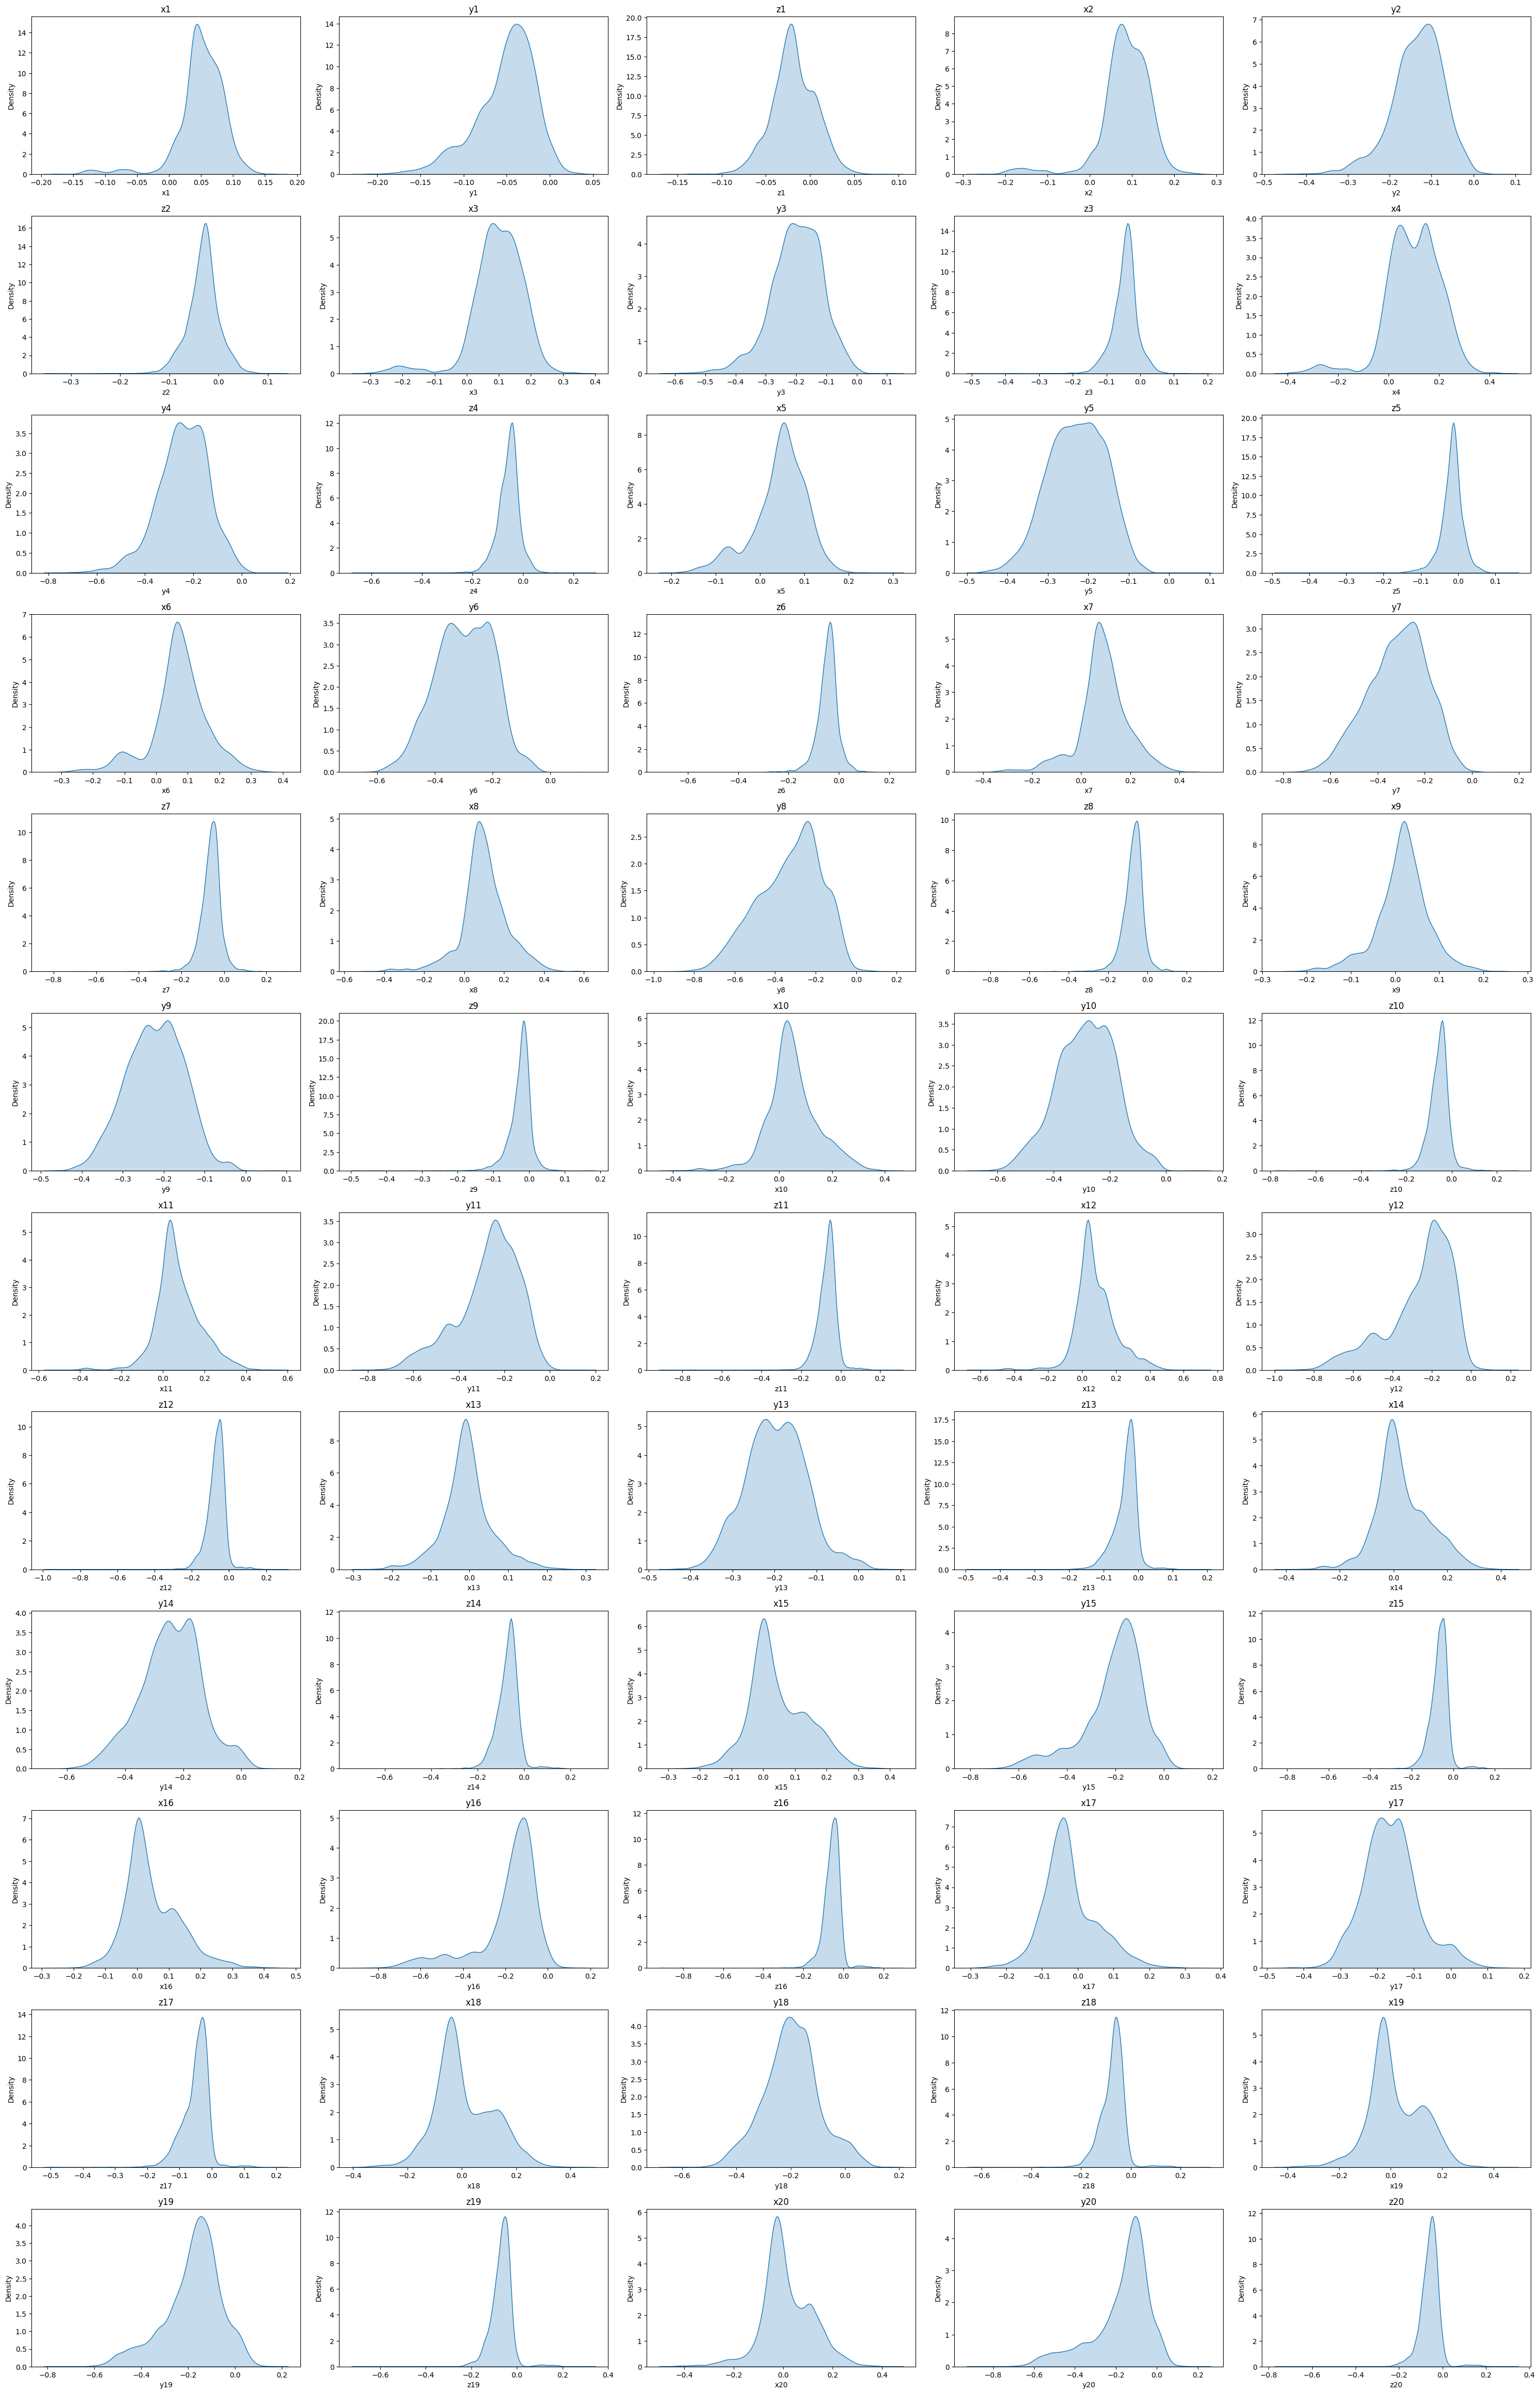

In [9]:
plt.figure(figsize= (30, 50))

for index, col in enumerate(df.columns[: -1], 1):
    plt.subplot(13, 5, index)
    sns.kdeplot(df[col], fill= True)
    plt.title(col)

plt.tight_layout()
plt.show()

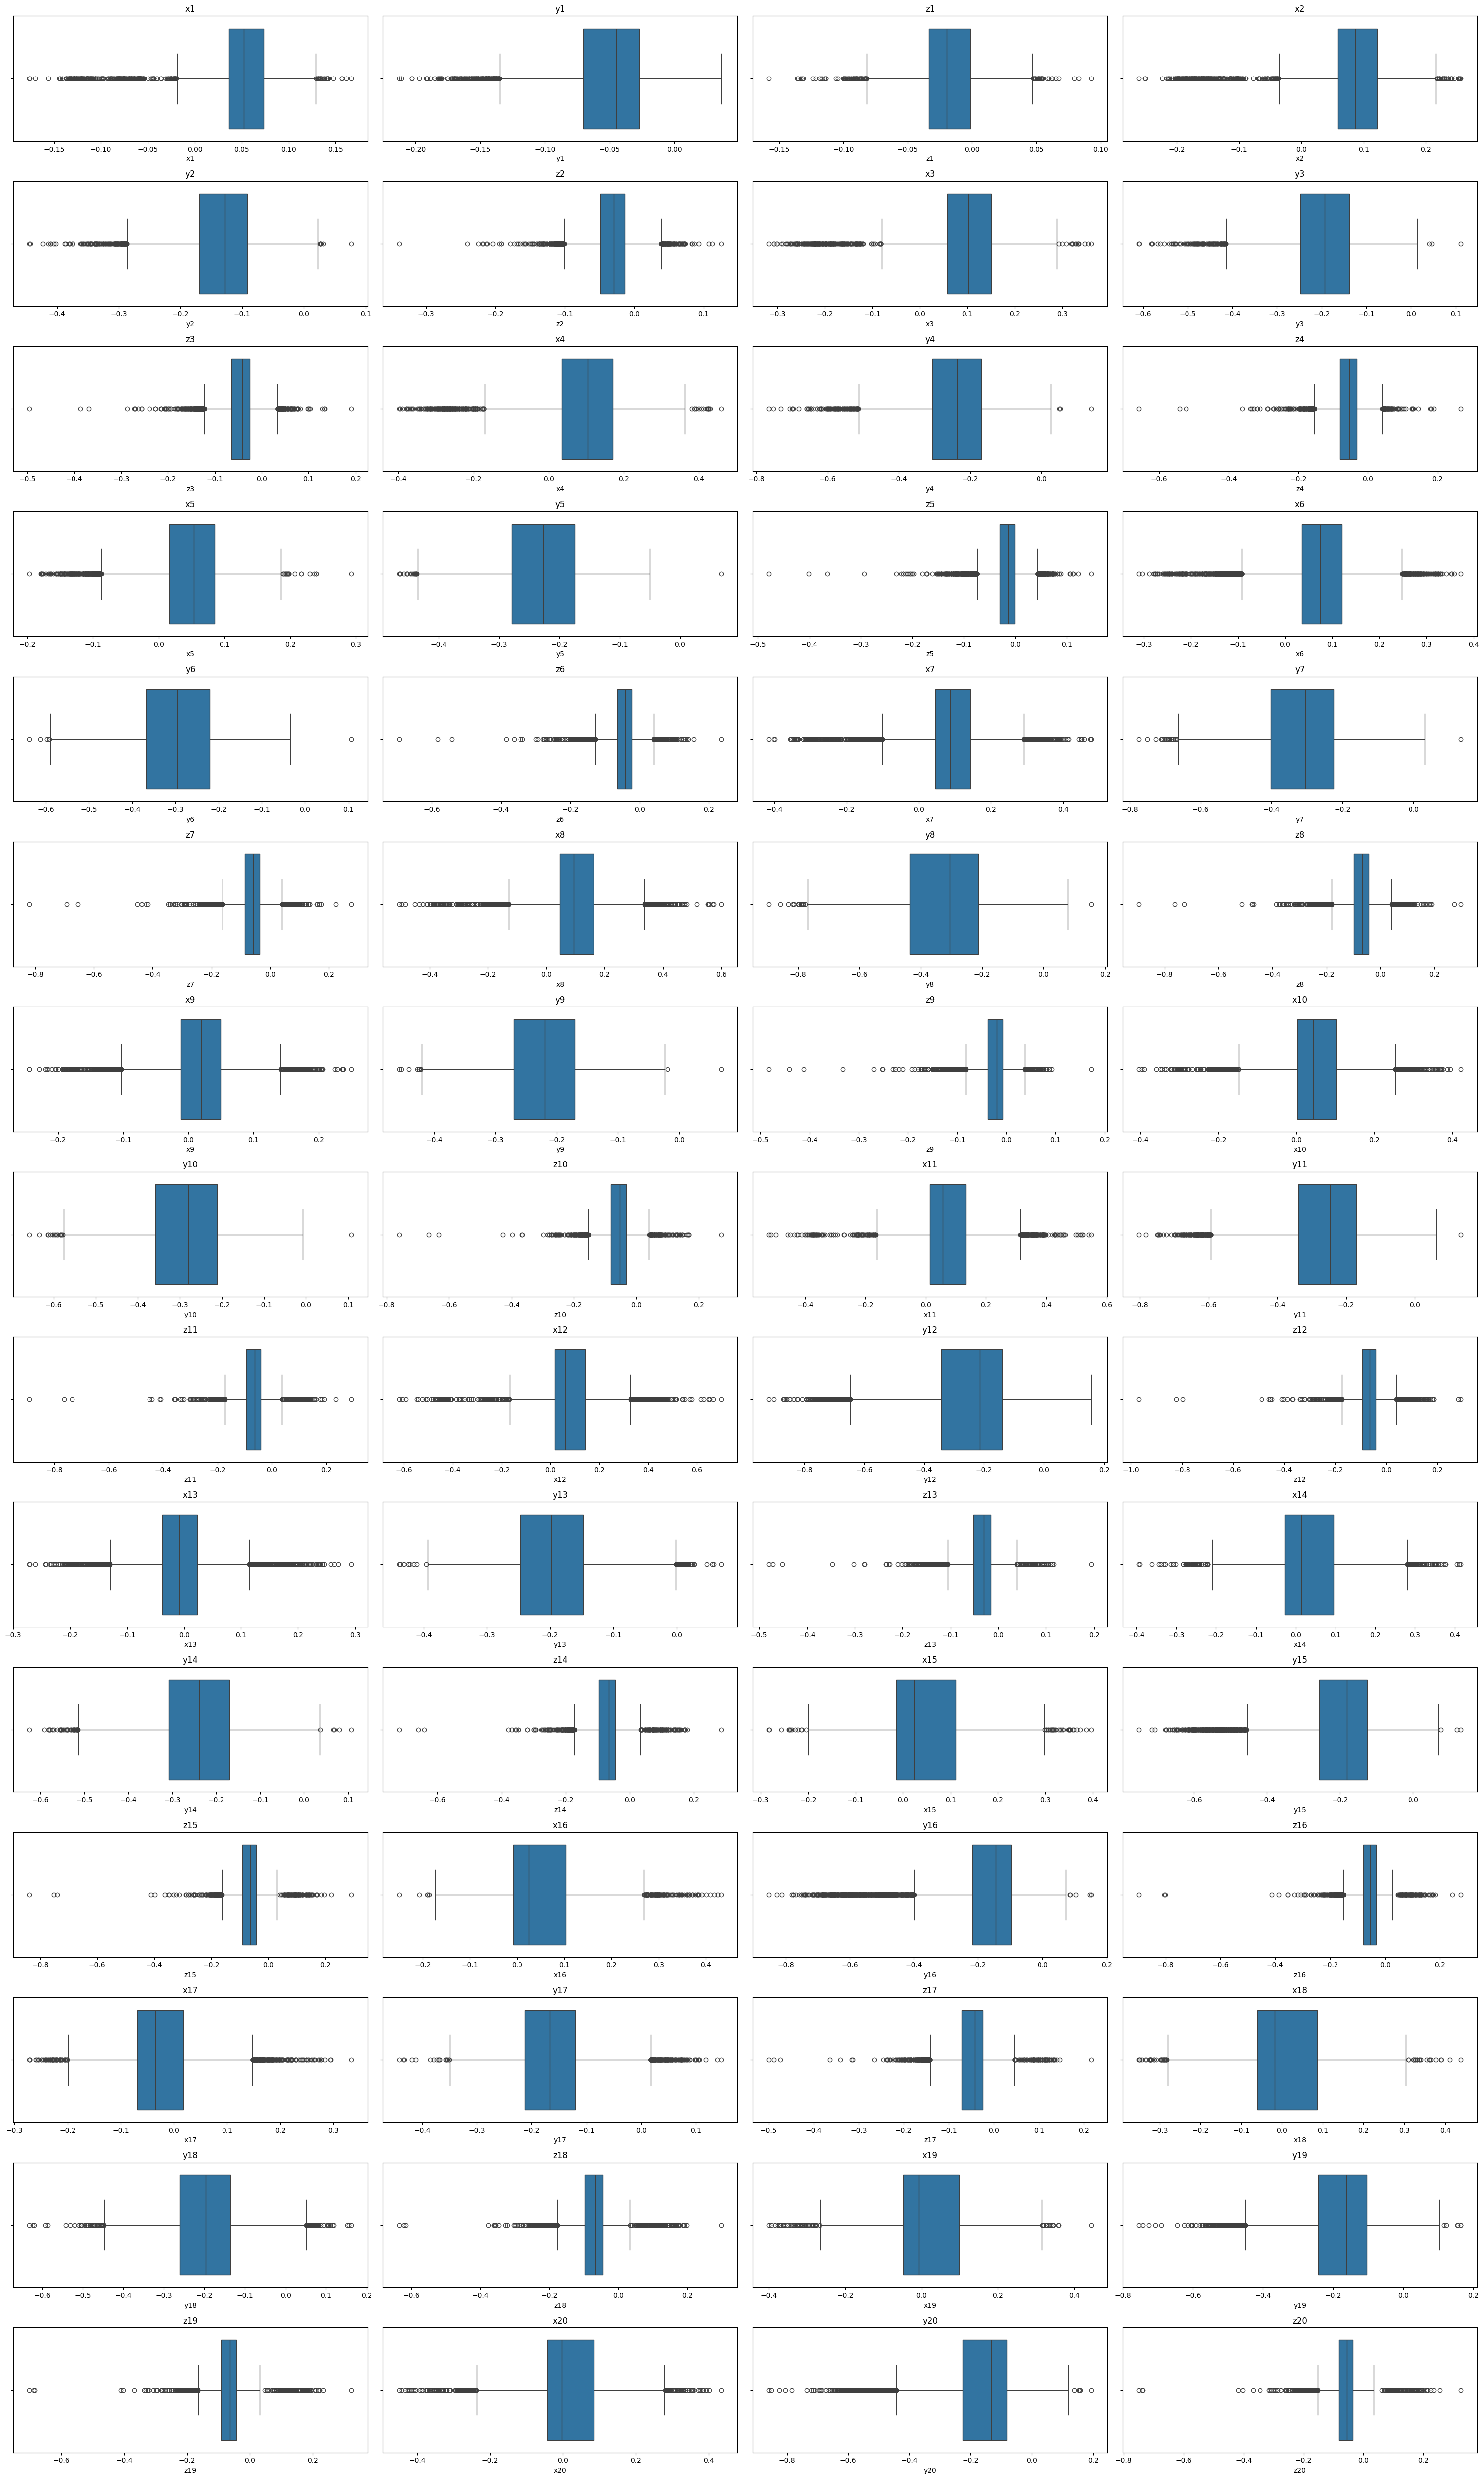

In [10]:
plt.figure(figsize= (30, 50))

for index, col in enumerate(df.columns[: -1], 1):
    plt.subplot(15, 4, index)
    sns.boxplot(x= df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

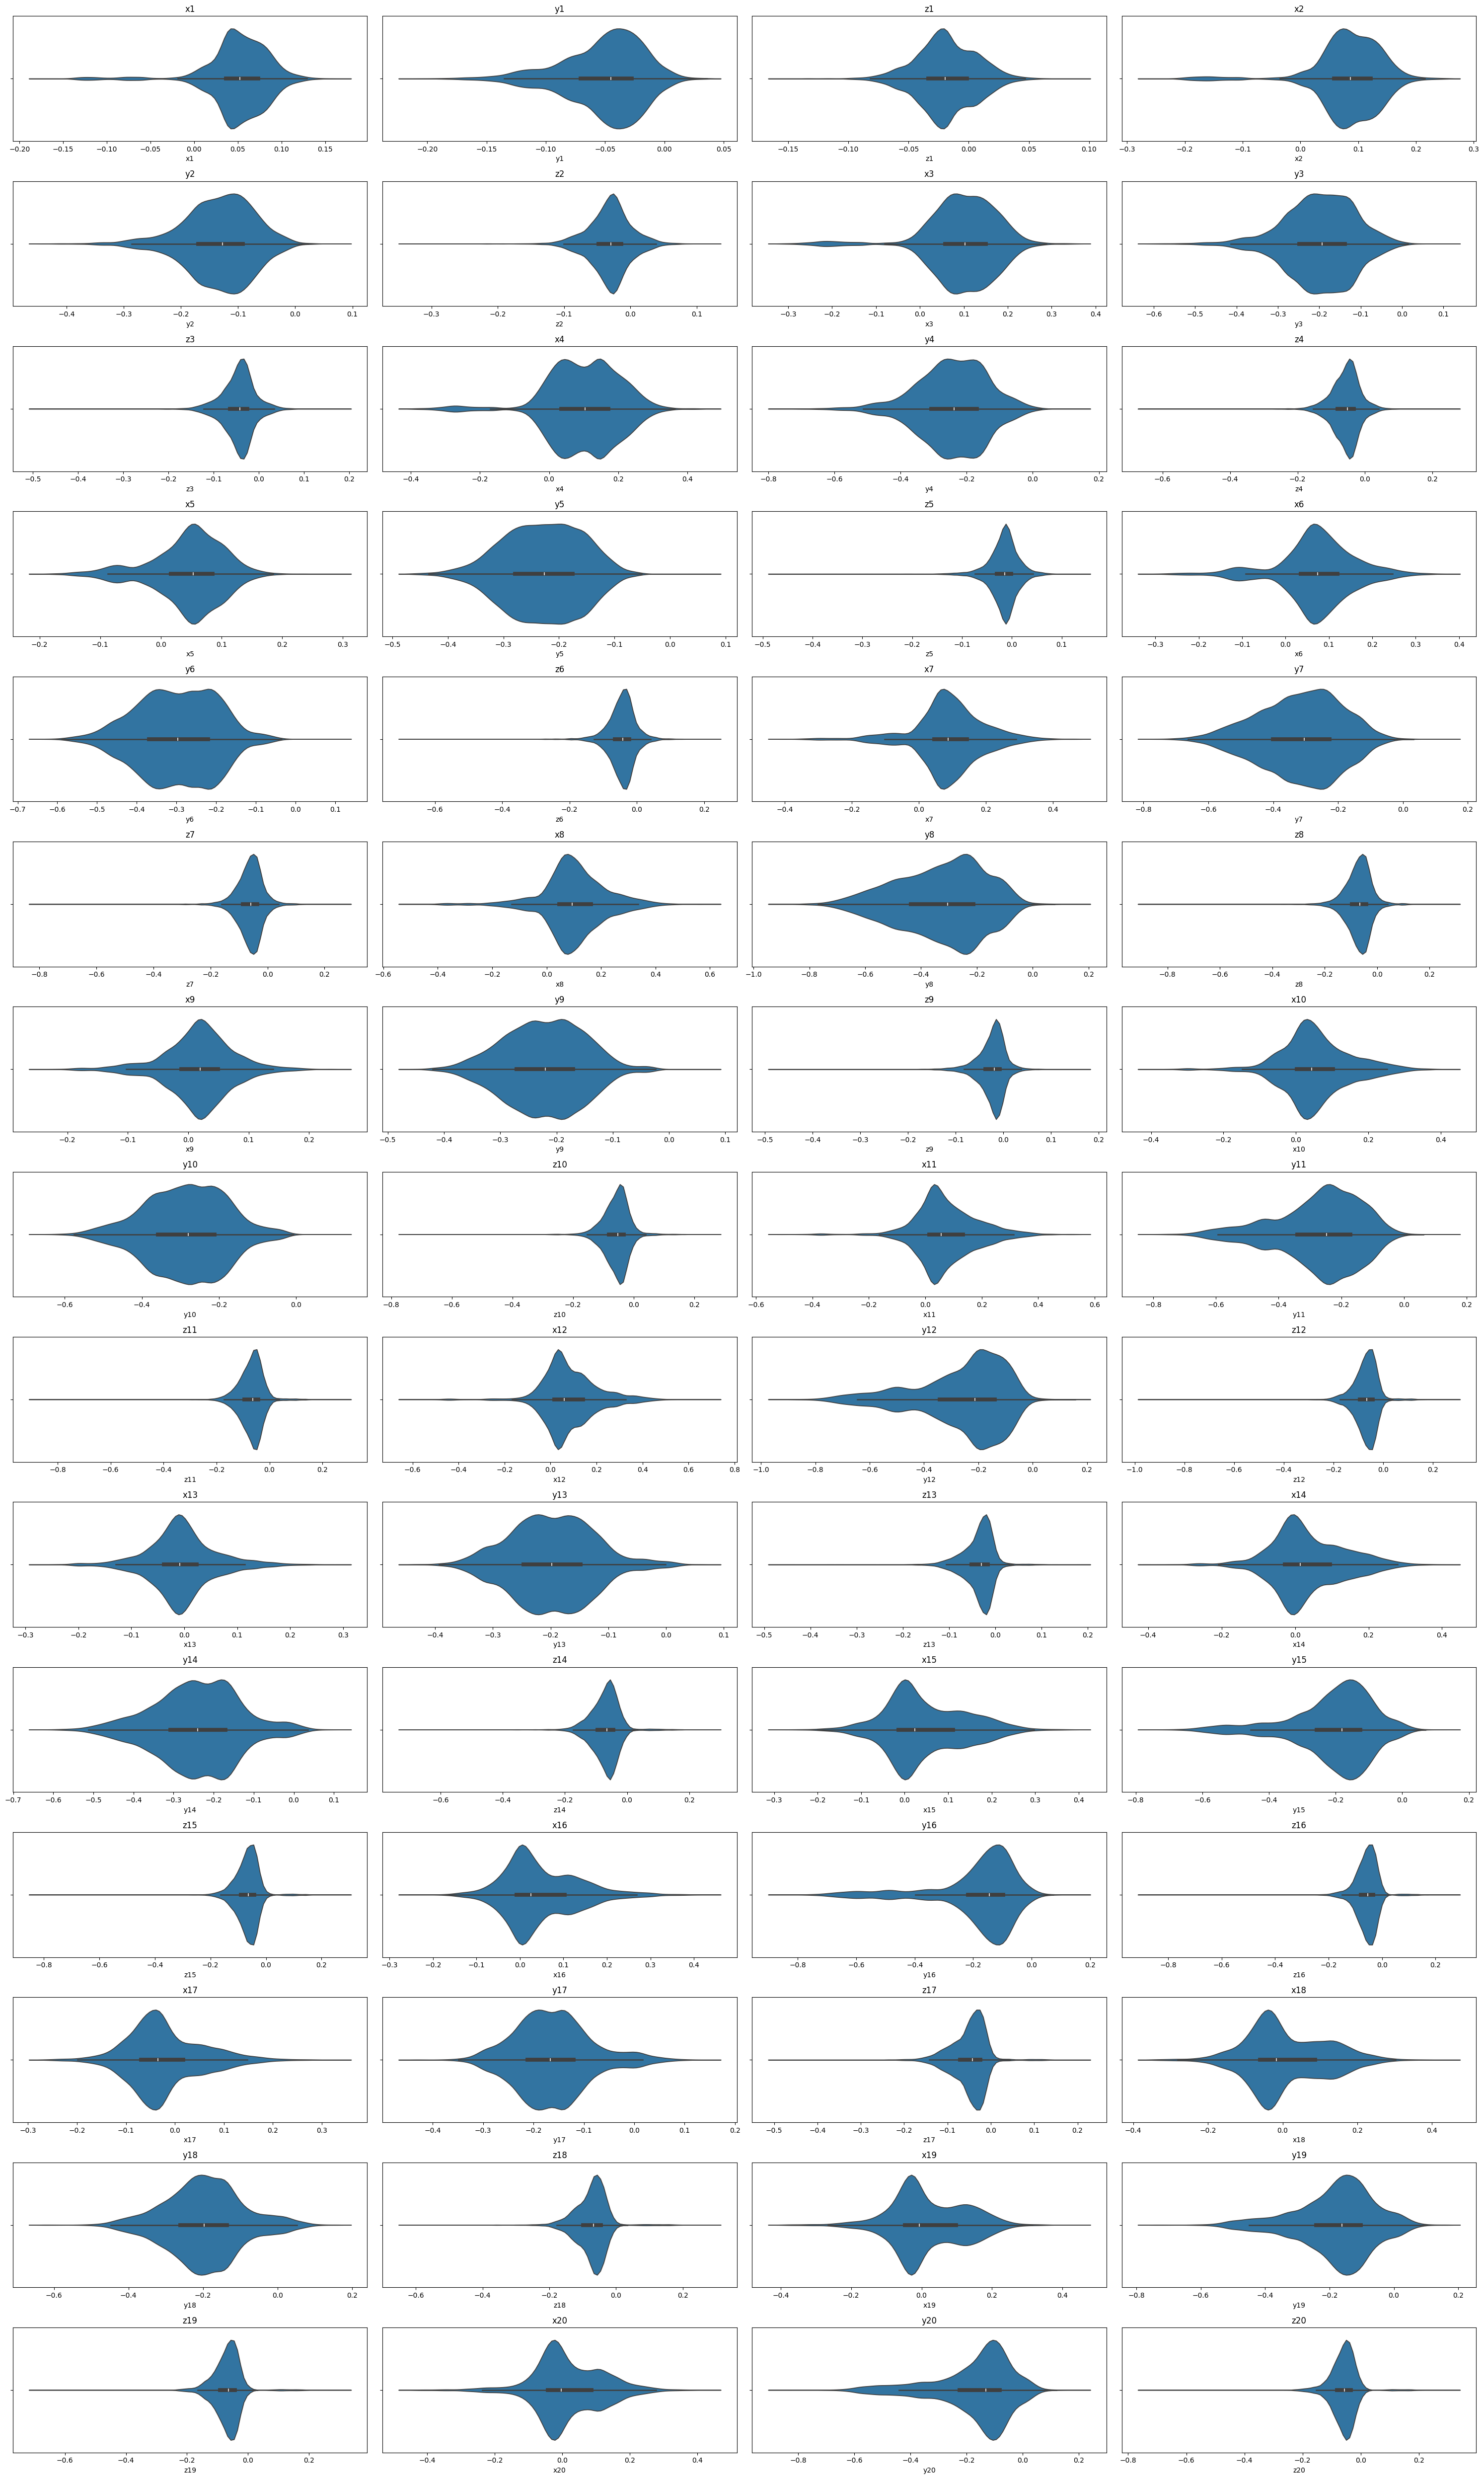

In [11]:
plt.figure(figsize= (30, 50))

for index, col in enumerate(df.columns[: -1], 1):
    plt.subplot(15, 4, index)
    sns.violinplot(x= df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

- The data has a lot of outlieres about 3-8% for every column (This is too much)
- In This data no need for hadle this because the outlaries is not extreme, ***and it represent the difference in the samples and hands and photos***
- We will use some models that don't be effected by outlries like (random forest, SVC,......)

In [12]:
Q1 = df.quantile(0.25, numeric_only= True)
Q3 = df.quantile(0.75, numeric_only= True)
IQR = Q3 - Q1

for col in df.select_dtypes(include= np.number).columns:
  lower_limit = Q1[col] - 1.5 * IQR[col]
  upper_limit = Q3[col] + 1.5 * IQR[col]
  filter = (df[col] < lower_limit) | (df[col] > upper_limit)

  outliers = df[filter]

  if not outliers.empty:
    outliers_count = len(outliers)
    outliers_percentage = (outliers_count / len(df)) * 100
    display(f'Outliers in {col}: {outliers_count} ({outliers_percentage:.2f}%')


'Outliers in x1: 298 (4.13%'

'Outliers in y1: 161 (2.23%'

'Outliers in z1: 91 (1.26%'

'Outliers in x2: 297 (4.11%'

'Outliers in y2: 154 (2.13%'

'Outliers in z2: 278 (3.85%'

'Outliers in x3: 260 (3.60%'

'Outliers in y3: 110 (1.52%'

'Outliers in z3: 345 (4.78%'

'Outliers in x4: 218 (3.02%'

'Outliers in y4: 106 (1.47%'

'Outliers in z4: 249 (3.45%'

'Outliers in x5: 290 (4.02%'

'Outliers in y5: 18 (0.25%'

'Outliers in z5: 438 (6.07%'

'Outliers in x6: 618 (8.56%'

'Outliers in y6: 5 (0.07%'

'Outliers in z6: 366 (5.07%'

'Outliers in x7: 567 (7.86%'

'Outliers in y7: 22 (0.30%'

'Outliers in z7: 315 (4.36%'

'Outliers in x8: 469 (6.50%'

'Outliers in y8: 17 (0.24%'

'Outliers in z8: 303 (4.20%'

'Outliers in x9: 417 (5.78%'

'Outliers in y9: 11 (0.15%'

'Outliers in z9: 407 (5.64%'

'Outliers in x10: 378 (5.24%'

'Outliers in y10: 16 (0.22%'

'Outliers in z10: 270 (3.74%'

'Outliers in x11: 286 (3.96%'

'Outliers in y11: 182 (2.52%'

'Outliers in z11: 274 (3.80%'

'Outliers in x12: 417 (5.78%'

'Outliers in y12: 248 (3.44%'

'Outliers in z12: 336 (4.66%'

'Outliers in x13: 540 (7.48%'

'Outliers in y13: 64 (0.89%'

'Outliers in z13: 354 (4.90%'

'Outliers in x14: 139 (1.93%'

'Outliers in y14: 47 (0.65%'

'Outliers in z14: 262 (3.63%'

'Outliers in x15: 41 (0.57%'

'Outliers in y15: 420 (5.82%'

'Outliers in z15: 289 (4.00%'

'Outliers in x16: 141 (1.95%'

'Outliers in y16: 755 (10.46%'

'Outliers in z16: 333 (4.61%'

'Outliers in x17: 257 (3.56%'

'Outliers in y17: 178 (2.47%'

'Outliers in z17: 266 (3.69%'

'Outliers in x18: 52 (0.72%'

'Outliers in y18: 133 (1.84%'

'Outliers in z18: 293 (4.06%'

'Outliers in x19: 62 (0.86%'

'Outliers in y19: 282 (3.91%'

'Outliers in z19: 300 (4.16%'

'Outliers in x20: 174 (2.41%'

'Outliers in y20: 513 (7.11%'

'Outliers in z20: 346 (4.79%'

The Percentage for every column outliers (it's too much)

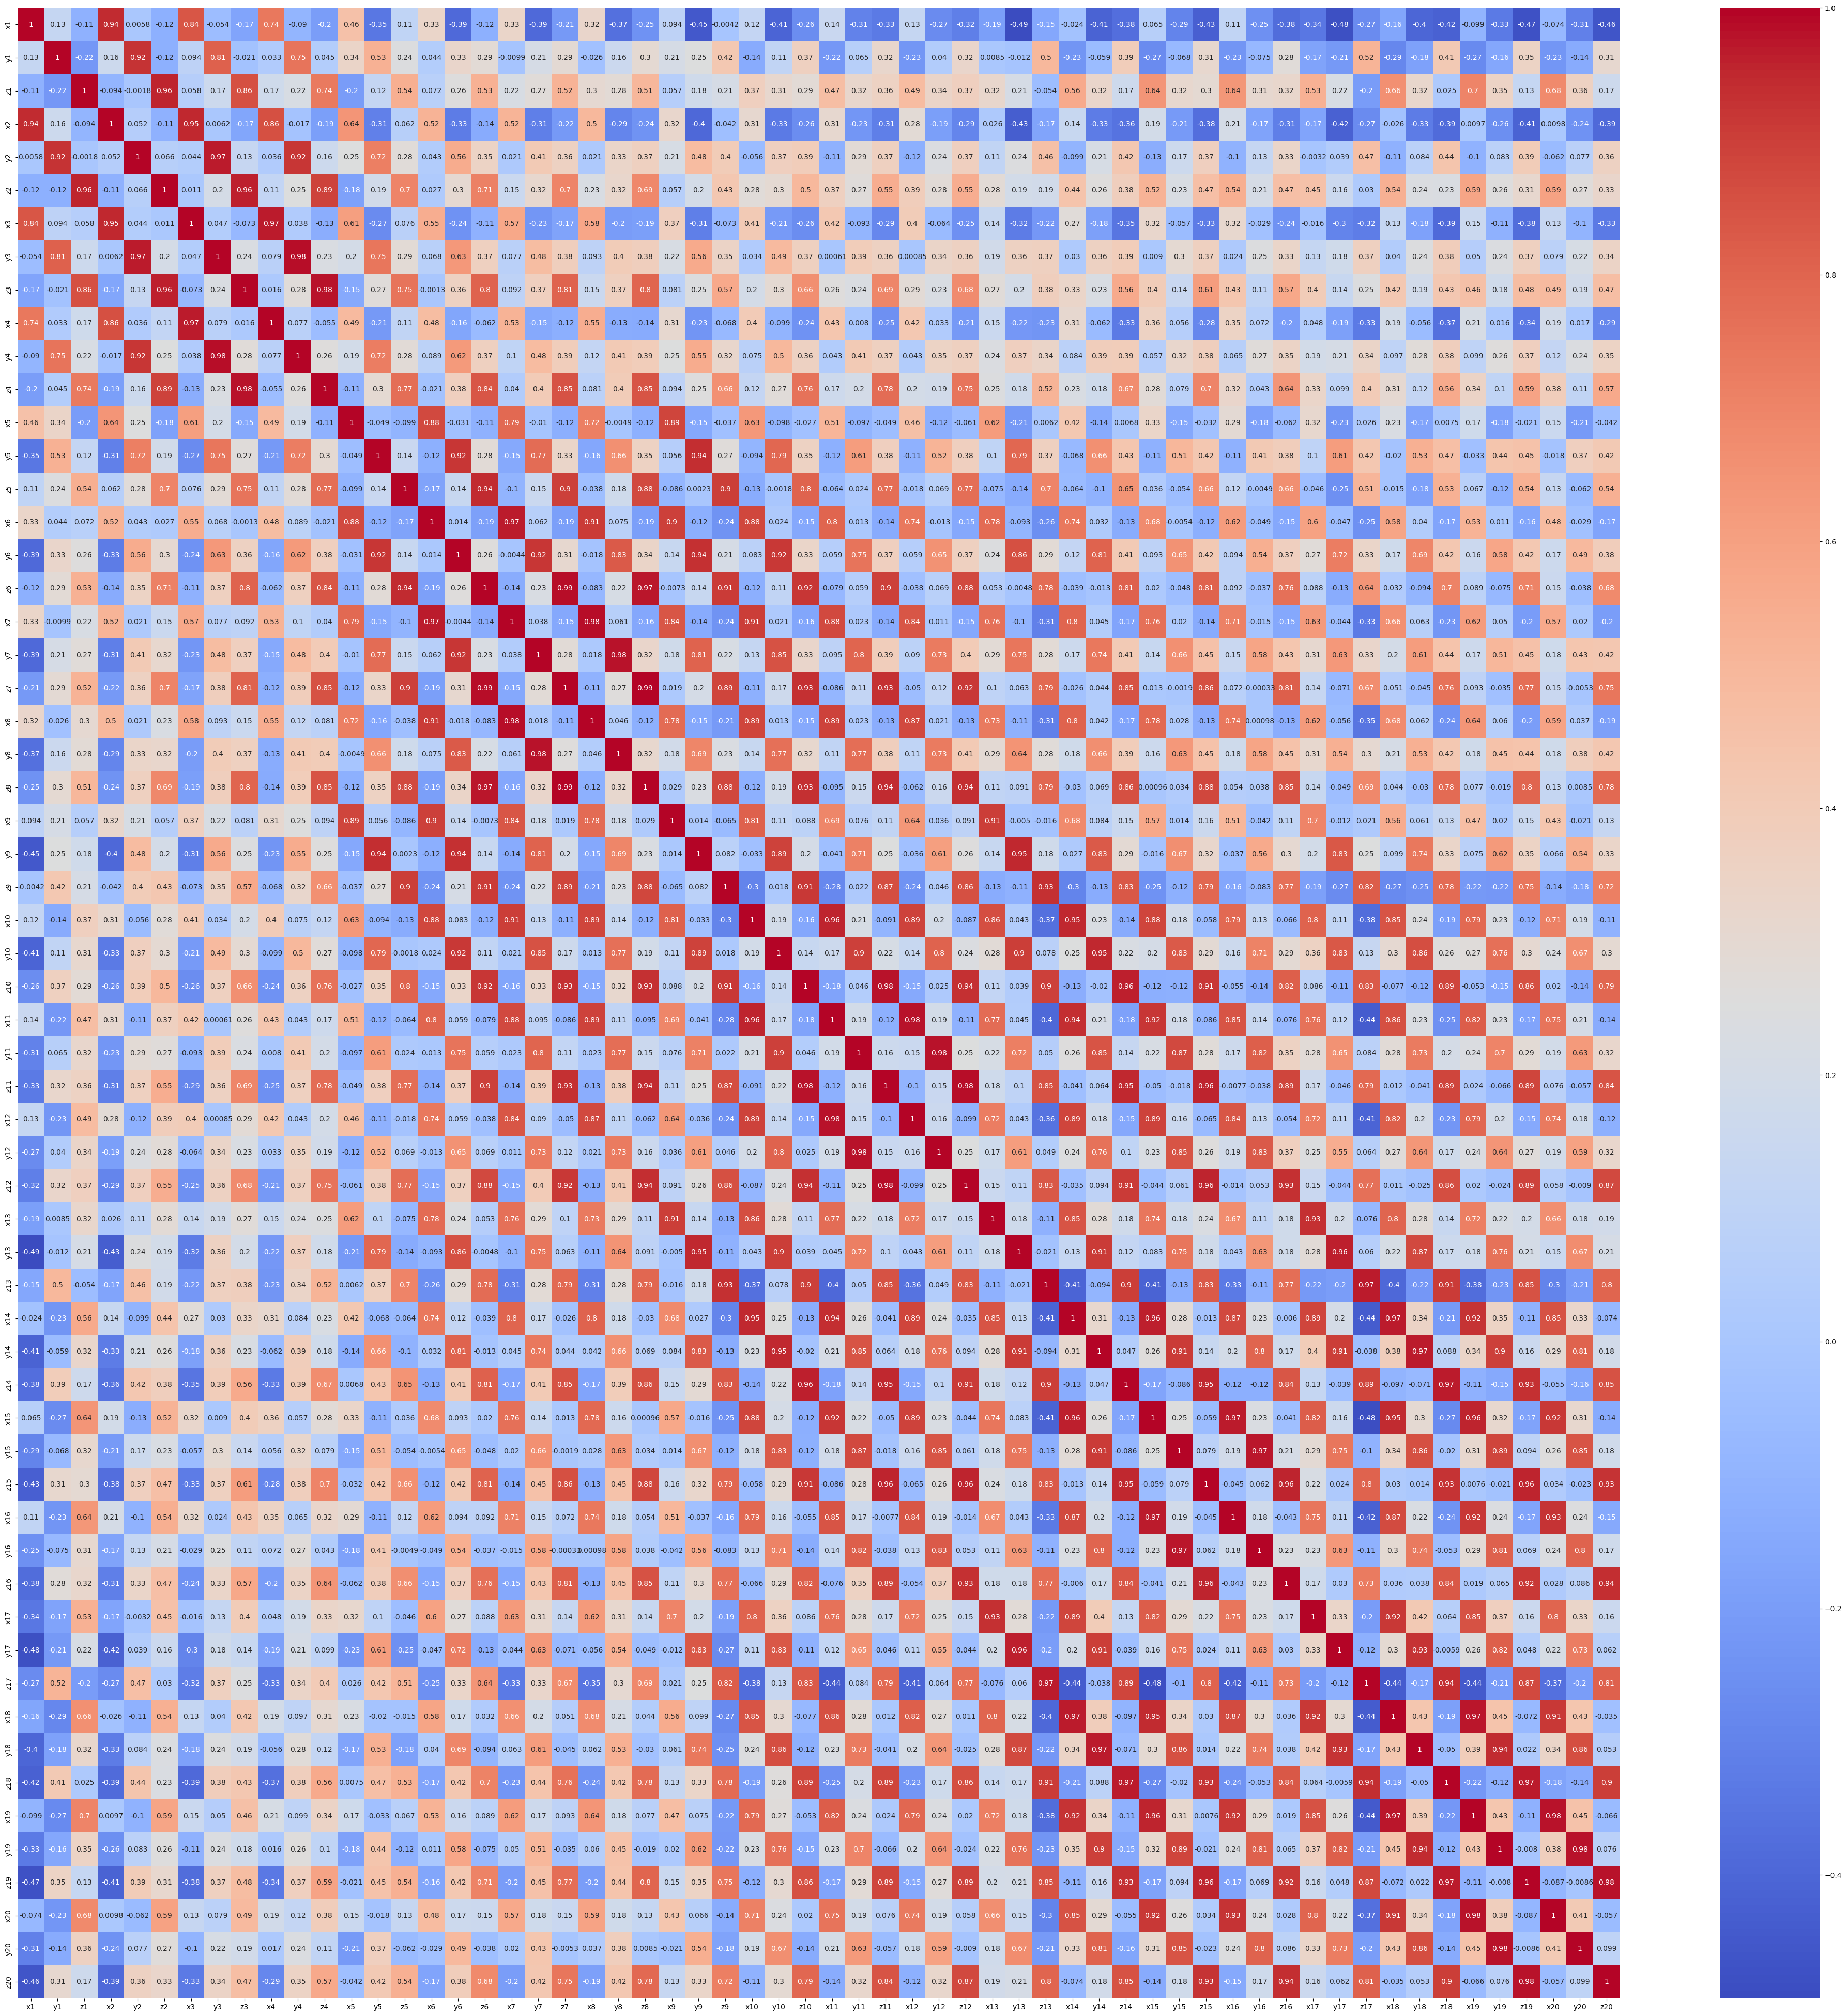

In [13]:
corr_matrix = df.corr(numeric_only = True)

plt.figure(figsize= (50, 50))
sns.heatmap(corr_matrix, annot= True, cmap= 'coolwarm')
plt.show()

- The Correleation Matrix for the relationship between the features
- There is so many features has big simelarity, (but this here is not a problem)

In [14]:
# Separating the target from the features
X = df.drop(columns=['label'])
y = df['label']


In [15]:
from sklearn.model_selection import train_test_split

# Splitting the data for training and testing the model in lazy predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Using LazyPredict to see the best models for the problem
from lazypredict.Supervised import LazyClassifier

# train, test, and models accuracy with lazy predict
clf = LazyClassifier(verbose= 1,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# sorting models by accuracy
models_sorted = models.sort_values(by="Accuracy", ascending=True)


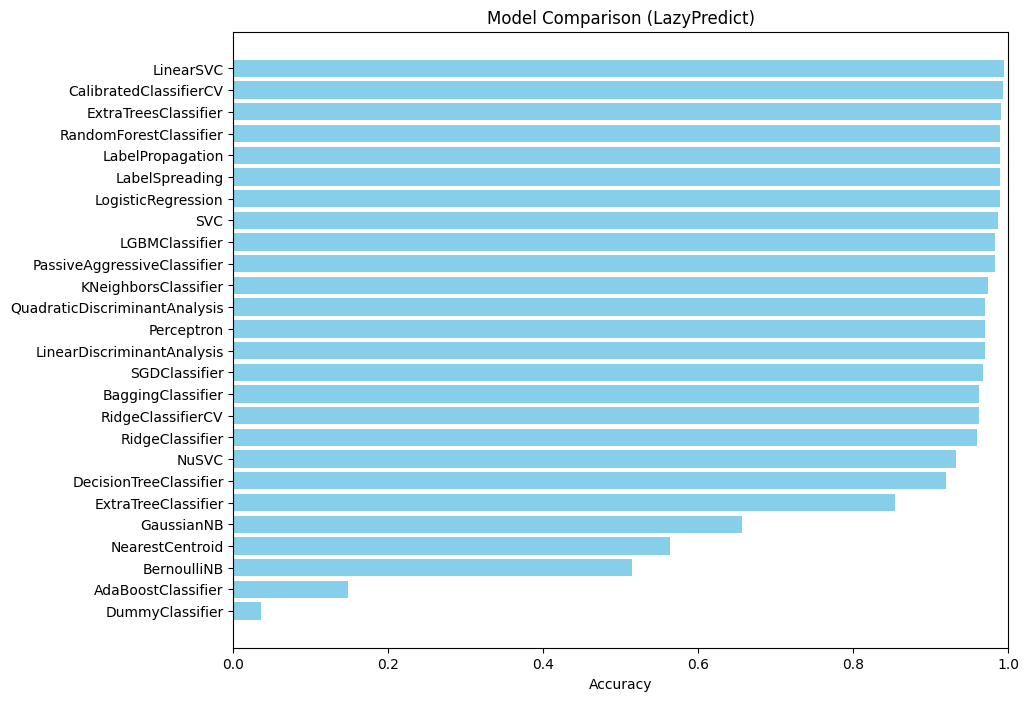

In [44]:
# Visualize models with there accuracy
plt.figure(figsize=(10,8))
plt.barh(models_sorted.index, models_sorted["Accuracy"], color="skyblue")
plt.xlabel("Accuracy")
plt.title("Model Comparison (LazyPredict)")
plt.xlim(0,1)
plt.show()

### Linear SVC Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

param_grid = {
    'C' : [.001, .01, .1, 1, 10, 100],
    'class_weight' : [None, 'balanced']
}

lsvc = LinearSVC()

grid_search_lsvc = GridSearchCV(
    estimator= lsvc,
    param_grid= param_grid,
    cv= 5,
    scoring= 'accuracy',
    verbose= 1,
    n_jobs= -1
)

# Traning
grid_search_lsvc.fit(X_train, y_train)

best_model_lsvc = grid_search_lsvc.best_estimator_

y_pred_lsvc = best_model_lsvc.predict(X_test)


print(f'Best Parameters : {grid_search_lsvc.best_params_}')
print(f'Best Cross-Validation Accuracy Score : {grid_search_lsvc.best_score_}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters : {'C': 100, 'class_weight': 'balanced'}
Best Cross-Validation Accuracy Score : 0.9916865110625942


 Accuarcy Is :  99.584
Precision Is :  0.996
Recall Is :  0.996
F1 Score Is :  0.996


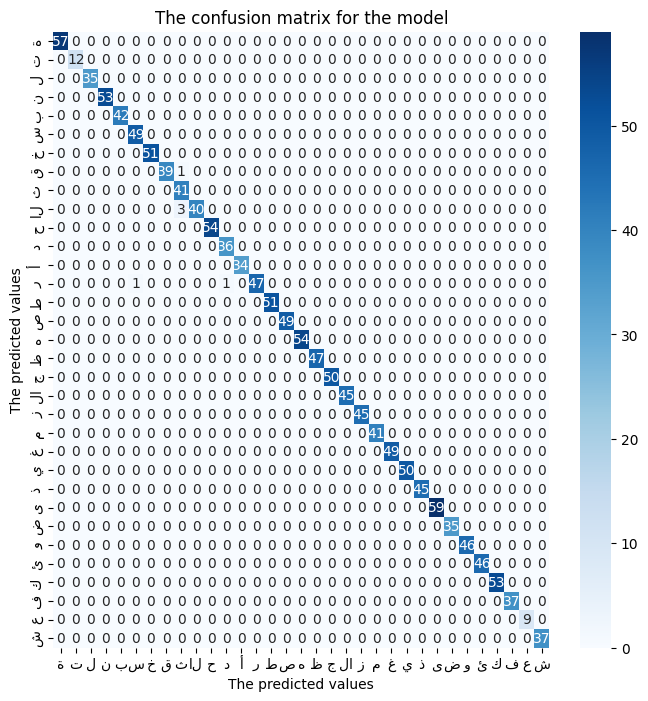

In [ ]:
# Evaluating
model_accuracy = accuracy_score(y_test, y_pred_lsvc)
model_confusion_matrix = confusion_matrix(y_test, y_pred_lsvc)
model_precision = precision_score(y_test, y_pred_lsvc, average= 'macro')
model_recall = recall_score(y_test, y_pred_lsvc, average= 'macro')
model_f1score = f1_score(y_test, y_pred_lsvc, average= 'macro')

print(f' Accuarcy Is : {model_accuracy * 100: .3f}')
print(f'Precision Is : {model_precision: .3f}')
print(f'Recall Is : {model_recall: .3f}')
print(f'F1 Score Is : {model_f1score: .3f}')

plt.figure(figsize= (8, 8))
sns.heatmap(model_confusion_matrix, annot= True,
            cmap= 'Blues',
            fmt = 'd',
            xticklabels = pd.unique(y),
            yticklabels = pd.unique(y))

plt.xlabel('The predicted values')
plt.ylabel('The predicted values')
plt.title('The confusion matrix for the model')
plt.show()


In [ ]:
import joblib
joblib.dump(best_model_lsvc, "LinearSVC_model.pkl")


['LinearSVC_model.pkl']